# INGT 1001 - Eksamen 

Kandidatnr: 10120, 10689,10367, 10623, 10265

## Innholdsfortegnelse 

### Element 1
- Sammendrag
- Innledning
- Metoder
- Diskusjon
- Feilkilder
- konklusjon

### Element 2
- Oppgaver
- Problemer


## Sammendrag
I denne oppgaven har vi gjort temperatur-, trykk, luftfuktighet og akselerasjonsmålinger i en heis ved NTNU Gløshaugen. Vi har brukt den innsamlede dataen til å si noe om hvilken etasje heisen befinner segD mest i.


# Innledning og problemstilling

Dette prosjektarbeidet startet med at gruppa drøftet frem og tilbake rundt hva vi ønsket å jobbe med. Vi ble enige om at vi ville jobbe med en oppgave som kunne brukes til å belyse et konkret spørsmål, eller andre typer praktiske problemstillinger.

Heiser er noe de fleste med sitt daglige virke på Gløshaugen benytter seg av opptil flere ganger daglig. Vi valgte å gjøre målingene våre i en av heisene i Realfagsbygget. Dette er en av de travleste plassene på Gløshaugen og at heisen beveger seg over ni etasjer tenkte vi ville være morsomt med tanke på dataanalysen. Heisen hadde og en naturlig «hylle» å legge raspberryen på under datainnsamlingen slik at den ikke ble i veien for noen og samtidig var ute av syne med tanke på tyveri.

En naturlig antakelse når man plasserer sensorer i en heis er at trykket endrer seg når heisen bytter etasje, og at forflytning gir utslag på akselerometer.

Problemene vi ønsker å belyse er:

- Hvilken etasje befinner heisen seg mest i? 
- Klarer vi å se en sammenheng mellom akselerasjon og trykkendring?

## Metode


### Presentasjon av kode for datainnsamling

Til dette arbeidet benytter vi oss av Raspberry Pi med en sensehat modul, plassert på en hylle inne i en heis for å samle inn data. 

Skriptet vårt er i hovedsak delt opp i to segmenter. Den første delen etablerer alle funksjonene skriptet trenger. Etter etableringen kommer delen av koden hvor funksjonene kjøres i en while-True-løkke, som både kaller på funksjonene og skriver funksjonsverdiene til en logfil.

Totalt skrev vi 9 funksjoner i koden vår. Fem av funksjonene gjør målinger med omgivelsessensorene til Sensehat. Èn av funksjonene henter IMU verdier fra sensehat. To funksjoner ble skrevet for å hente CPU temperatur, samt forsøke å korrigere for feil i temperaturmålingene. Disse endte vi med å ikke bruke. Vi skrev også en funksjon for å skrive data til en .csv fil og en for å vise tekst på sensehat. Sistnevnte ble i hovedsak brukt til feilsøking, men ligger fortsatt i kodefila.


### Presentasjon av kode

``` python
def temp_hum():
  """ Gets temperature from humidity sensor. returns average from A number of measurements"""
  A = 5
  temp_sum = 0
  for _ in range (0, A):
    t = sh.get_temperature_from_humidity()  
    temp_sum += t 
    sleep(0.05)
  temp_sum = temp_sum / A
  return (temp_sum)

Koden over illustrerer hvordan vi samlet inn data. Samme type funksjon ble benyttet for alle sensormålingene. 
Vi valgte å gjøre A antall målinger for så å returnere gjennomsnittet av disse hver gang funksjonen ble kalt på. Dette var for å minimere antall feilmålinger som kunne dukke opp i datasettet vårt. A-verdi og sleep() tid ble justert slik at tiden scriptet brukte på å kjøre alle funksjonene ikke ble for lang i forhold til hvor ofte vi ønskte å gjøre målinger. Loggetid ble ca annenhvert sekund. Vi mente det var naturlig med så hyppig loggefrekvens for å få med så mange endringer i trykk og akselerasjon som mulig. 


### Kode for logging

``` python 
def write(temp_hum, temp_pres, hum, pres, accel):
  """ Takes six values and saves it to a .csv file with date and timestamp"""
  date = dt.now().strftime("%d/%m/%Y")
  time = dt.now().strftime("%H:%M:%S")
  data = [(date), (time), (temp_hum), (temp_pres), (hum), (pres), (accel) ]
  desired_path = '/home/bendin/'
  file_path = os.path.join(desired_path, "Maalinger.csv")
  with open(file_path, "a") as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(data)
    return (csvfile)


Ovenfor vises koden vi brukte for å logge innsamlet data til en .csv fil for senere behandling. I denne versjonen benyttet vi navnene for de verdiene som skulle lagres i stedet for a, b, c, etc. Generiske variabelnavn ville trolig vært lurere dersom koden skulle blitt anvendt til forskjellige bruksområder, men vi følte det var like hensiktsmessig å ha de faktiske navnene der. I hovedsak bare for å holde styr på hvilke verdier som ble lagret hvor. Koden kan absolutt brukes til å lagre andre typer data i en .csv fil ved senere anledninger.

Dersom vi skulle endret på noe hadde det nok vært lurt å finne en måte å redusere antall funksjoner på.
Om vi hadde skrevet funksjonene slik at de hadde tatt inn ett argument for hvilken sensor den skulle logge fra hadde vi kunnet redusert antall funksjoner ganske drastisk. Om dette ville vært hensiktsmessig bruk av tid eller ikke er litt vanskelig å svare på i ettertid.


## Oppsett av Systemd

Å kjøre koden som bakgrunnsprosess viste seg å være essensielt for å få gjennomført prosjektet. Å kommunisere med en raspberry i en heis som konstant beveger seg mellom ulike wifi-hotspots viste seg å være vrient, men ved hjelp av systemd kunne vi kjøre skriptet uten å ha behov for kommunikasjon. 

For å sette opp systemd fulgte vi oppskriften presentert i oppgaveteksten. Vi startet med å opprette en .service fil i /etc/systemd/system folderen. En .service fil tillater oss å kjøre skript som bakgrunnsprosesser i Rasbperryen. Fila kaller på skriptet vi har skrevet og ved hjelp av kommandoen «sudo systemctl enable maalinger.service» gir vi beskjed om at vi ønsker at fila skal starte ved oppstart. 


            Temp_hum      Temp_pres       Humidity       Pressure  \
count  193266.000000  193266.000000  193266.000000  193266.000000   
mean       35.567735      36.426792      17.782329    1006.192214   
std         3.194704       3.240857       3.510907       6.143567   
min        19.138485      20.272917       5.701220      75.827881   
25%        33.207470      33.970833      15.864634    1000.818115   
50%        35.059128      35.924999      17.006096    1006.848877   
75%        37.818466      38.702084      19.131706    1008.657471   
max        42.756226      43.537498      53.415855    1022.845703   

        Acceleration  
count  193266.000000  
mean        9.863711  
std         0.265247  
min       -13.104258  
25%         9.850960  
50%         9.870080  
75%         9.882029  
max        15.476667  
         Date      Time   Temp_hum  Temp_pres   Humidity     Pressure  \
0  25/11/2020  15:42:15  19.556015  20.877083  52.384148  1009.329346   
1  25/11/2020  15:42:17  

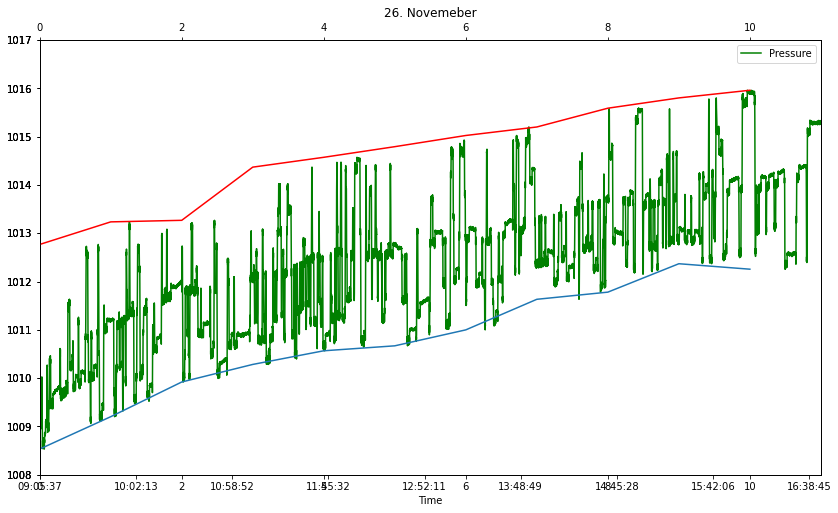

/Users/bendiknygard/Documents/GitHub/ingt1001-prosjektet/INGT INNLEVERING/heis_analyse_funksjoner.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novemberData[1]["Pressure"][i + y*window] = value + offsetvals[y]/2
/Users/bendiknygard/Documents/GitHub/ingt1001-prosjektet/INGT INNLEVERING/heis_analyse_funksjoner.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutNovemberData = createAdjustedGraphs(data_from_all_days[7].iloc[0:20300])


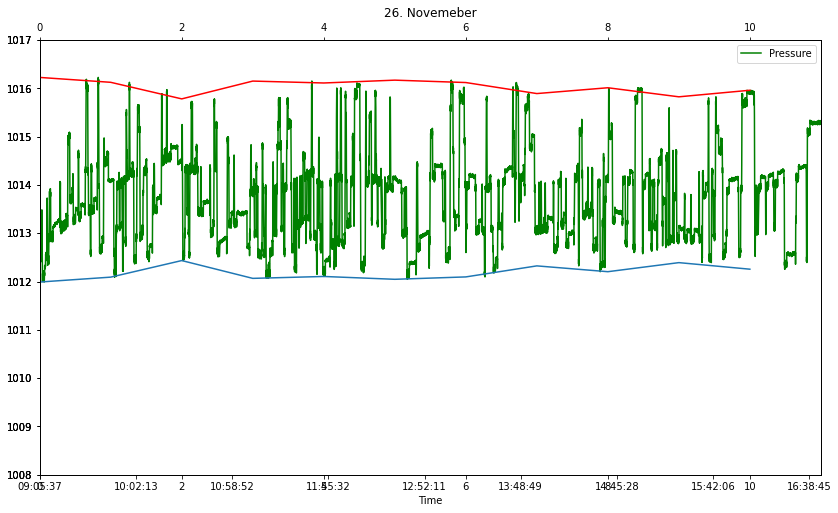

/Users/bendiknygard/Documents/GitHub/ingt1001-prosjektet/INGT INNLEVERING/heis_analyse_funksjoner.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novemberData[2]["Pressure"][i + y*window] = newValue
/Users/bendiknygard/Documents/GitHub/ingt1001-prosjektet/INGT INNLEVERING/heis_analyse_funksjoner.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutNovemberData = createAdjustedGraphs(data_from_all_days[7].iloc[0:20300])


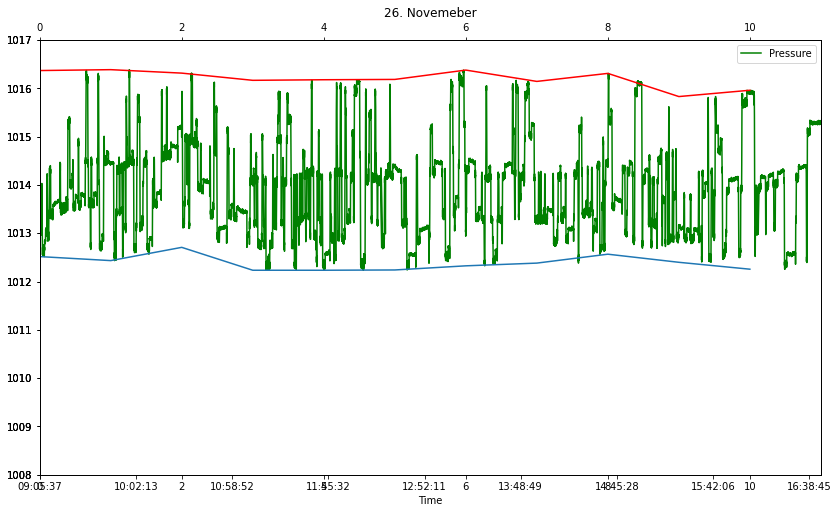

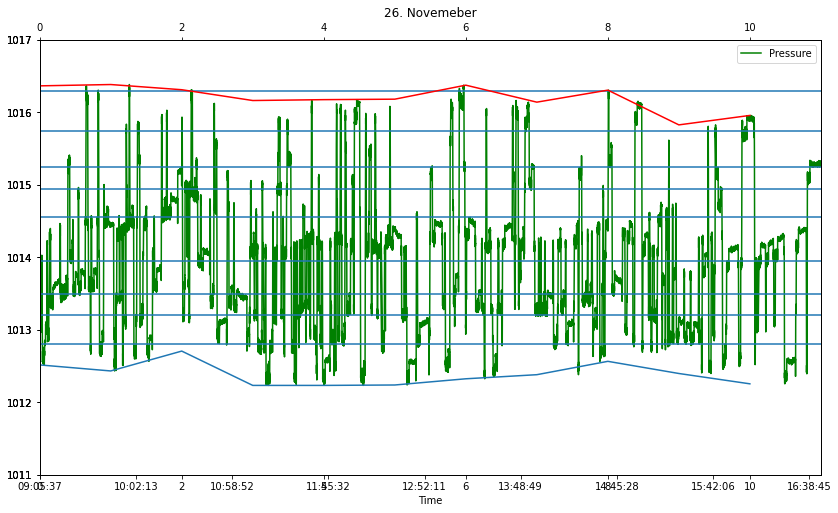

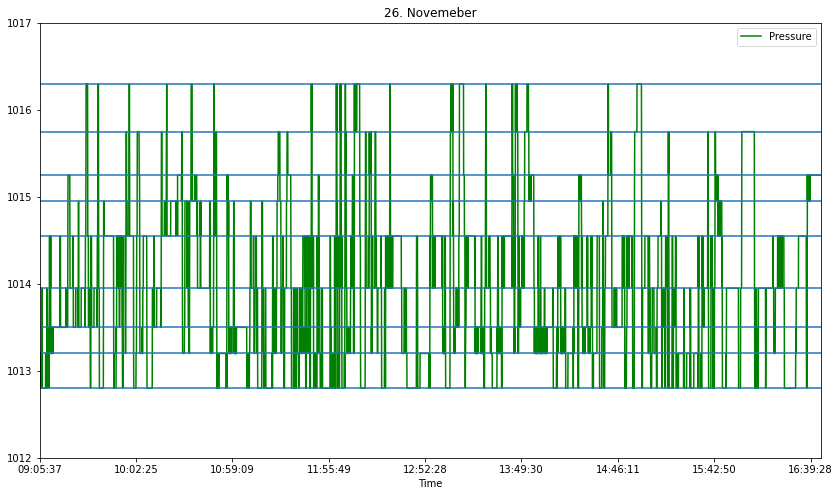

           Pressure
count  20268.000000
mean    1013.946127
std        0.918471
min     1012.800000
25%     1013.200000
50%     1013.950000
75%     1014.550000
max     1016.300000
1013.95    4031
1012.80    3658
1014.55    3568
1013.20    2825
1013.50    2693
1015.25    1088
1015.75     962
1014.95     903
1016.30     540
Name: Pressure, dtype: int64


In [1]:
from heis_analyse_funksjoner import*

## Behandling av data

For å analysere datasettet importerte vi det inn i spyder. Vi startet med å navngi kolonnene med tilhørende sensornavn og utførte grunnleggende datahygiene som dropNA og fjerning av ekstremalverdier som tydelig var feilmålinger. Vi følte det var nødvendig å fjerne trykkverdier over 1050 og under 900 (hPa), samt akselerasjonsverdier under 5 og over 16(m/s^2).  

Deretter separerte vi målingene ut fra hvilken dag de ble tatt. Hver dag fikk et eget datasett for enklere og mer hensiktsmessig plotting. 

Vi tenkte det var hensiktsmessig å presentere 

Så plottet vi utvalgte målinger i grafer relevante for problemstillingene våre. 

## Analyse og presentasjon av data

Vi spekulerte lenge på hva som ville være en hensiktsmessig måte å fremstille dataen vår på.

En av hovedutfordringene i dette arbeidet ble hvordan vi skulle finne ut hvilken etasje heisen befant seg i til enhver tid. Først så vi for oss å gjøre kontrollmålinger med trykksensoren og bruke disse som verdier for hver etasje, men med tanke på værendringer i løpet av dagen ble dette svært unøyaktig.
Vi valgte heller å finne min- og maxverdiene i trykket for hver halvtime(1800sek)
Bruker det til å «normalisere?» dataen. 

Offset verdi 1800. Deler inn i like mange deler 
Blokkmanipulasjon 
Lineærblokkmanipulasjon 



# Diskusjon

## Feilkilder
I et arbeid som dette er det naturligvis mange feilkilder som dukker opp. Alt fra trøbbel med målinger til feil i dataanalysearbeidet. 

Et konkret problem som dukket opp når vi skulle analysere dataen var at vi ikke hadde tatt høyde for at lufttrykket er forskjellig fra dag til dag. Vi så opprinnelig for oss at å ha ett sett med baseline-målinger for hver etasje kunne brukes til å si noen om hvilken etasje heisen befant seg i for alle målingene våre. Med tanke på at lufttrykket endrer seg fra dag til dag skjønte vi etter hvert at dette ikke kom til å fungere. Vi gikk dermed for en kompromissløsning der vi så på min- og maxverdiene for hver dag og delte opp differansen i bolker for hver etasje. For at dette skulle ha blitt nøyaktig måtte atmosfærisk trykkendring ha oppført seg lineært, noe vi vet det ikke gjør.  

Temperaturmålingene våre endte med å ikke kunne fortelle oss noe om klimaet i heisen. På grunn av dårlig konstruksjon påvirkes temperatursensorene til sensehat i stor grad av CPU-temperaturen til Raspberryen. I tillegg plasserte vi Raspberryen like ved ei lampe i heisen, noe som videre gjorde temperaturmålingene upålitelige.


Ideelt skulle vi ha gjort referansemålinger for hver dag vi gjorde målinger. Dersom vi hadde kjørt heisen til kjeller og toppetasje når vi startet målingene om morgenen, og før vi avsluttet for dagen ville vi hatt bedre referansepunkter for å kunne kompensere for endringene i løpet av dagen.  

Et annet problem med denne måten å regne ut etasjene på er at dersom ingen har vært i kjelleren en dag vil utregningene våre for den dagen 

I løpet av arbeidet med denne oppgaven innså vi at det eksisterer andre måter å finne svar på problemstillingen vår. 


# Konklusjon 
Å si noe konkret om hvilken etasje heisen befant seg i viste seg å være vanskeligere enn først antatt. Dersom alle målingene våre hadde vært pålitelige kunne vi muligens ha brukt barometriske utregninger til å regne oss frem til hvilken etasje vi befant oss i, men denne innfallsvinkelen ble ikke brukt i dette arbeidet. 


# Oppgaver

In [5]:
from Element2_Pandas import* #importerer python-filen som en modul

# Oppgave 1:
Har importert filen 2342202.csv i python-filen og kalt den for "df_opg1"

# Oppgave 2:

Man ser at dataen er organisert i 92099 rader og fire kolonner: Station, Name, Date og TAVG.
Datasettet består av datatypene "object" og "float64" hvor TAVG består av "float64"-verdier og resten er "object".

NB! En kan se at i TAVG kolonnen så finnes det bare 7606 rader som ikke er null-verdier.

In [2]:
df_opg1.head()

,STATION,NAME,DATE,TAVG
0,US1NYWC0003,"WHITE PLAINS 3.1 NNW, NY US",2017-01-03,NaN
1,US1NYWC0003,"WHITE PLAINS 3.1 NNW, NY US",2017-01-04,NaN
2,US1NYWC0003,"WHITE PLAINS 3.1 NNW, NY US",2017-01-05,NaN
3,US1NYWC0003,"WHITE PLAINS 3.1 NNW, NY US",2017-01-06,NaN
4,US1NYWC0003,"WHITE PLAINS 3.1 NNW, NY US",2017-01-09,NaN


In [3]:
df_opg1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92099 entries, 0 to 92098
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  92099 non-null  object 
 1   NAME     92099 non-null  object 
 2   DATE     92099 non-null  object 
 3   TAVG     7606 non-null   float64
dtypes: float64(1), object(3)
memory usage: 2.8+ MB


# oppgave 3:
Dropper duplikerte rader og rader med null-verdier vha. "drop_dup_nan" funksjonen, og fikser index-verdiene vha. "fix_index" funksjonen.

Man ser at det nå er kun 7606 gjenværende rader i df_opg1. Dette er fordi at en stor majoritet av de 92099 radene i TAVG-kolonnen inneholdt null-verdier.

In [4]:
drop_dup_nan(df_opg1)
fix_index(df_opg1)
df_opg1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7606 entries, 0 to 7605
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  7606 non-null   object 
 1   NAME     7606 non-null   object 
 2   DATE     7606 non-null   object 
 3   TAVG     7606 non-null   float64
dtypes: float64(1), object(3)
memory usage: 237.8+ KB


# Oppgave 4:
"NAME" kolonnen blir delt i to kolonner "Area" og "Country" vha. funksjonen "split_NAME" fra spyder-filen.

In [5]:
split_NAME(df_opg1)
df_opg1.head()

,STATION,DATE,TAVG,AREA,COUNTRY
0,USW00014732,2017-01-01,46.0,LAGUARDIA AIRPORT,NY US
1,USW00014732,2017-01-02,40.0,LAGUARDIA AIRPORT,NY US
2,USW00014732,2017-01-03,42.0,LAGUARDIA AIRPORT,NY US
3,USW00014732,2017-01-04,47.0,LAGUARDIA AIRPORT,NY US
4,USW00014732,2017-01-05,34.0,LAGUARDIA AIRPORT,NY US


# Oppgave 5:
COUNTRY-kolonnen deles i to kolonner CITY og COUNTRY vha. "split_COUNTRY" funksjonen.

In [6]:
split_COUNTRY(df_opg1)
df_opg1.head()

,STATION,DATE,TAVG,AREA,COUNTRY,CITY
0,USW00014732,2017-01-01,46.0,LAGUARDIA AIRPORT,US,NY
1,USW00014732,2017-01-02,40.0,LAGUARDIA AIRPORT,US,NY
2,USW00014732,2017-01-03,42.0,LAGUARDIA AIRPORT,US,NY
3,USW00014732,2017-01-04,47.0,LAGUARDIA AIRPORT,US,NY
4,USW00014732,2017-01-05,34.0,LAGUARDIA AIRPORT,US,NY


# Oppgave 6: 
"fix_COUNTRY" er en funksjon som endrer "COUNTRY"-kolonnen til landskoder på to bokstaver. I df_opg1 trengs ikke denne fordi dens "COUNTRY"-kolonne er allerede blitt endret til landskoder på to bokstaver i oppgave 5.

"fix_COUNTRY"-funksjonen gjør jobben effektivt ved å ta i bruk den innebygde pandas-funksjonen "rsplit" ("Series.str.rsplit"), men det finnes også alternative måter å løse denne oppgaven på. Under er to alternativer som ikke tar i bruk noen innebygde pandas-funksjoner:

alternativ 1 - Funksjonen oppnår det samme resultatet som "fix_COUNTRY" funksjonen ved å gå gjennom hver rad i datasettet. Den splitter radens "COUNTRY"-verdi (som består av enten en landskode, eller en bykode og en landskode) til en liste, for så å sette radens "COUNTRY"-verdi lik det siste elementet i denne listen (som alltid manl være en landskode).

```python
def alternativ1(df):
    for n in range(0, len(df)):
        df["COUNTRY"][n] = df["COUNTRY"][n].split(" ")[-1]```

alternativ 2 - Funksjonen har den samme funksjonaliteten som alternativ 1, men tar i bruk en while-løkke i stedet for en for-løkke.
```python
def alternativ2(df):
    n = 0
    while n < len(df):
        df["COUNTRY"][n] = df["COUNTRY"][n].split(" ")[-1]      
        n+=1```

# Oppgave 7:
I spyder-filen er "2342207.csv" blitt importert og kalt for "df_opg7". Funksjonen "trinn_3_4_6" er også blitt definert for å gjøre trinn 3, 4 og 6 for en valgfri df.

In [7]:
trinn_3_4_6(df_opg7)
df_opg7.head()

,STATION,DATE,TAVG,AREA,COUNTRY
0,FIE00142101,1/1/2017,33.0,HELSINKI ILMALA,FI
1,FIE00142101,1/2/2017,26.0,HELSINKI ILMALA,FI
2,FIE00142101,1/3/2017,21.0,HELSINKI ILMALA,FI
3,FIE00142101,1/4/2017,9.0,HELSINKI ILMALA,FI
4,FIE00142101,1/5/2017,1.0,HELSINKI ILMALA,FI


# Oppgave 8:
Funksjonen "combine_dfs" fra spyder-filen blir brukt for å sette sammen df_opg1 og df_opg7 til en df_opg8, og for å fikse index-verdiene til den resulterende df-en.

In [8]:
df_opg8 = combine_dfs(df_opg1, df_opg7)

In [9]:
df_opg8.head()

,STATION,DATE,TAVG,AREA,COUNTRY,CITY
0,USW00014732,2017-01-01,46.0,LAGUARDIA AIRPORT,US,NY
1,USW00014732,2017-01-02,40.0,LAGUARDIA AIRPORT,US,NY
2,USW00014732,2017-01-03,42.0,LAGUARDIA AIRPORT,US,NY
3,USW00014732,2017-01-04,47.0,LAGUARDIA AIRPORT,US,NY
4,USW00014732,2017-01-05,34.0,LAGUARDIA AIRPORT,US,NY


# Oppgave 9:
For å kontrollere at df-en fra trinn 8 er riktig kan man sjekke at lengden på df-en fra trinn 8 er lik summen av lengdene til de to tidligere df-ene som den består av. Dersom lengdene samsvarer kan man konkludere med at alle radene fra de to tidligere df-ene også finnes i den nye df-en fra trinn 8, og at den dermed sannsynligmans er slik som man forventer.

Funksjonen "kontroll" fra spyder-filen blir brukt for å utføre denne oppgaven.

Funksjonen printer "Riktig lengde" dersom lengden til de to tidligere df-ene samsvarer med lengden på df_opg8.

In [10]:
kontroll(df_opg1, df_opg7, df_opg8)

Riktig lengde


# Oppgave 11:
Alle filene fra "weather"-mappen er blitt importert i Spyder-filen og lagret i en liste kalt "all_dfs".

Funksjonen "fix_dfs_in_list" blir brukt for å kjøre trinn 3, 4 og 6 for hver df i en liste.


In [11]:
fix_dfs_in_list(all_dfs)

# Oppgave 12:
"Trondheim.csv"-filen er blitt importert og kalt for "df_trondheim" i Spyder-filen.
"trinn_3_4_6"-funksjonen blir brukt for å kjørertrinn 3, 4 og 6 for "df_trondheim".

In [12]:
trinn_3_4_6(df_trondheim)

#  Oppgave 13:
Under lages en ny kolonne TAVG som er gjennomsnittet av TMIN og TMAX:


In [13]:
df_trondheim["TAVG"] = (df_trondheim["TMIN"]+df_trondheim["TMAX"])/2

In [14]:
df_trondheim = df_make_default(df_trondheim)

In [15]:
df_trondheim.head()

,STATION,DATE,TAVG,AREA,COUNTRY
0,NOE00111040,2017-01-01,34.0,TRONDHEIM VOLL,NO
1,NOE00111040,2017-01-02,30.5,TRONDHEIM VOLL,NO
2,NOE00111040,2017-01-03,30.5,TRONDHEIM VOLL,NO
3,NOE00111040,2017-01-04,20.5,TRONDHEIM VOLL,NO
4,NOE00111040,2017-01-05,14.0,TRONDHEIM VOLL,NO


# Oppgave 15:
Skal kombinere alle df-ene til en større df kalt "df_complete".
Funksjonen "combine_dfs_in_list" er definert for å kombinere alle df-er i en liste vha. pandas "concat-funksjonen". Den legger også "df_trondheim" til i listen "all_dfs" sammen med alle de andre df-ene. 

In [16]:
df_complete = combine_dfs_in_list(all_dfs, df_trondheim)

In [17]:
df_complete.head()

,STATION,DATE,TAVG,AREA,COUNTRY
0,DEW00035032,1/1/2017,26.0,RHIEN MAIN,DE
1,DEW00035032,1/2/2017,32.0,RHIEN MAIN,DE
2,DEW00035032,1/3/2017,34.0,RHIEN MAIN,DE
3,DEW00035032,1/4/2017,37.0,RHIEN MAIN,DE
4,DEW00035032,1/5/2017,31.0,RHIEN MAIN,DE


# Oppgave 16:
Importerer "countryContinent.csv" til en df kalt "df_country_continent"

In [18]:
df_country_continent = pd.read_csv('Datasets/countryContinent.csv', encoding="iso_8859_1")

# Oppgave 17:
Man kan se at df_country_continent er strukturert i 9 kolonner. 

Kolonnene inneholder informasjon om land, som hmanlke region de befinner seg i, regions-koden, lands-koden osv. 

Blant all denne informasjonen er det mye som kan være unyttig når man analyserer temperaturdata. Det som kan være nyttig å mante derimot er: land, lands-kode, kontinent og region. Fordi denne informasjonen er relevant til temperaturdataen.

In [19]:
df_country_continent.head(10)

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0
5,Andorra,AD,AND,20,ISO 3166-2:AD,Europe,Southern Europe,150.0,39.0
6,Angola,AO,AGO,24,ISO 3166-2:AO,Africa,Middle Africa,2.0,17.0
7,Anguilla,AI,AIA,660,ISO 3166-2:AI,Americas,Caribbean,19.0,29.0
8,Antarctica,AQ,ATA,10,ISO 3166-2:AQ,NaN,NaN,NaN,NaN
9,Antigua and Barbuda,AG,ATG,28,ISO 3166-2:AG,Americas,Caribbean,19.0,29.0


# Oppgave 18:
Bruker "merge" funksjonen til å slå sammen "df_complete" og "df_country_continent" til en df "df_complete_cont".

Df-ene blir slått sammen med hensyn på kolonnene "COUNTRY" (fra "df_complete") og "code_2" (fra "df_country_continent"), fordi disse kolonnene samsvarer.


In [20]:
df_complete_cont = pd.merge(df_complete, df_country_continent, left_on="COUNTRY", right_on="code_2")

# Oppgave 19:
Funksjonen "trinn19()" er blitt definert i spyder-filen. Den dropper kolonnen "code_2" og gir nye navn til de forespurte kolonnene. 

In [21]:
df_complete_cont = trinn19(df_complete_cont)

# Oppgave 21:
Funksjonen "column_values()" er blitt definert i Spyder-filen. Den finner, sorterer og returnerer alle unike verdier fra en kolonne i en dataframe. 

Her er de innebygde pandas funksjonene "sort_values()" og "unique()" blitt brukt for å kun ta med unike navn på land og for å sortere listen alfabetisk.

Alternativt kunne man enkelt ha definert en funksjon for dette på egenhånd også på måten vist under. Her defineres først en tom liste "unique_values", og så går funksjonen gjennom hvert land i kolonnen "Country" i "df_complete_cont". Dersom landet ikke allerede finnes i listen "unique_values" så legger den det til i listen. Deretter brukes den innebygde python-funksjonen "sorted()" til å sortere listen alfabetisk:


```python
def alternativ(df, column):
    unique_values = []

    for value in list(df[column]):
        if value not in unique_values:       
            unique_values.append(value)
    unique_values = sorted(unique_values)
    
alternativ(df_complete_cont, "Country")```


In [22]:
countries_in_df = column_values(df_complete_cont, "Country")
continents_in_df = column_values(df_complete_cont, "Continent")

# Oppgave 22:
Funksjonen "f_to_c()" er definert i spyder-filen. Den konverterer grader i fahrenheit til grader i celcius. Her brukes den til å konvertere alle verdiene i kolonnen "TAVG" til celcius.

Konverteringen fra fahrenheit til celcius gikk uten problemer, i stor grad fordi man kunne ta i bruk en enkel funksjon for å konvertere alle verdiene samtidig. Dersom det derimot hadde fantes en blanding av verdier målt i celcius og fahrenheit uten at enhetene var oppgitt, hadde man hatt et mye vanskeligere problem å løse. 

Dersom man skulle konvertert denne blandingen av temperaturenheter til én enhet måtte man først og fremst sjekket om verdiene var målt i Celcius eller i Fahrenheit. Det finnes ikke en måte å gjøre dette på med 100% sikkerhet, men man kunne prøvd å rasjonalisere seg fram til et svar. Alle temperaturer over 56.7 grader må være målt i fahrenheit, med mindre landet har satt en ny varmerekord. Om man anntar at hvert land bruker én temperatur-enhet så kan man konkludere med at alle målingene fra land som har temperatur-verdier over 56.7 grader bruker enheten fahrenheit. Deretter gjenstår landene som kun har målinger under 56.7 grader. For å finne ut hvilken enhet disse målingene er gjort i så kan man sammenligne med målinger fra omkringliggende land som man allerede har bestemt at har temperatur målt i fahrenheit. For eksempel ved å se på andre land som ligger i samme region, sub-region og på samme kontinent. Om landets temperatur ligger langt under omkringliggende lands gjennomsnittstemperatur så kan man konkludere med at målingene er gjort i celcius. Deretter kunne man konvertert kun de målingene som var i "feil" enhet. 

In [23]:
df_complete_cont["TAVG"] = f_to_c(df_complete_cont["TAVG"])

In [24]:
df_complete_cont

,STATION,DATE,TAVG,AREA,Country-code,Country,code_3,country_code,iso_3166_2,Continent,sub_region,region_code,sub_region_code
0,DEW00035032,1/1/2017,-3.33,RHIEN MAIN,DE,Germany,DEU,276,ISO 3166-2:DE,Europe,Western Europe,150.0,155.0
1,DEW00035032,1/2/2017,0.00,RHIEN MAIN,DE,Germany,DEU,276,ISO 3166-2:DE,Europe,Western Europe,150.0,155.0
2,DEW00035032,1/3/2017,1.11,RHIEN MAIN,DE,Germany,DEU,276,ISO 3166-2:DE,Europe,Western Europe,150.0,155.0
3,DEW00035032,1/4/2017,2.78,RHIEN MAIN,DE,Germany,DEU,276,ISO 3166-2:DE,Europe,Western Europe,150.0,155.0
4,DEW00035032,1/5/2017,-0.56,RHIEN MAIN,DE,Germany,DEU,276,ISO 3166-2:DE,Europe,Western Europe,150.0,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40345,KZ000035188,12/27/2019,-12.22,ASTANA,KZ,Kazakhstan,KAZ,398,ISO 3166-2:KZ,Asia,Central Asia,142.0,143.0
40346,KZ000035188,12/28/2019,-5.00,ASTANA,KZ,Kazakhstan,KAZ,398,ISO 3166-2:KZ,Asia,Central Asia,142.0,143.0
40347,KZ000035188,12/29/2019,-5.00,ASTANA,KZ,Kazakhstan,KAZ,398,ISO 3166-2:KZ,Asia,Central Asia,142.0,143.0
40348,KZ000035188,12/30/2019,-13.33,ASTANA,KZ,Kazakhstan,KAZ,398,ISO 3166-2:KZ,Asia,Central Asia,142.0,143.0


# Problemer

# problem 2
Den høyeste registrerte temperaturen på jorda noensinne er 56,7 C. Samsvarer dataen fra "df_complete_cont" med dette?
For å svare på dette kan man se om den høyeste verdien i "df_complete_cont" overstiger 56.7 grader.
Man kan bruke den innebygde pandas-funksjonen "max()" for å se at den høyeste temperaturverdien i datasettet er 43.33 grader, og dermed konkludere med at dataen samsvarer med påstanden.

In [25]:
df_complete_cont["TAVG"].max()

43.33

# Problem 3
For å finne ut av hvilket kontinent som har den laveste gjennomsnittstemperaturen og hvilket som har den høyeste gjennomsnittstemperaturen kan man bruke funksjonen "average_temp_by_continent". Den returnerer en liste med alle kontinentene og deres gjennomsnittstemperaturer. Man kan se at Afrika er varmest, og at Europa er kaldest.

In [26]:
average_temp_by_continent(df_complete_cont, continents_in_df)

[('Africa', 27.682153598281452),
 ('Americas', 11.584049084249092),
 ('Asia', 18.59882081753908),
 ('Europe', 7.183662299403037),
 ('Oceania', 15.052185491276399)]

# Problem 4
Her brukes funksjonen "plot_continents()" for å lage subplots for hvert kontinent som finnes i dataframen "df_complete_cont". I hver av disse subplottene plottes hvert land som befinner seg i kontinentet. Dette gir en god oversikt og visuell representasjon av temperaturen i hvert land.

Man kan se at det er store svingninger i temperaturene og at noen land har mer data enn andre. De store temperatursvingningene kommer fra årstidene. Temperaturen varierer med sesongene, noe som er lett å se på grafene. 
Lengden på grafene varierer også. For eksempel kan man se at Canada har mange flere målinger enn Brazil, som fører til at Canadas graf strekker seg lengre. Dette kommer av at mengden værmålingsstasjoner varierer fra land til land. Et land med to værmålingsstasjoner vil ha dobbelt så mange målinger som et land med kun én værmålingsstasjon.

Vi kan også se svingningsmønsteret til grafen for hvert land. Det er omtrent samme gjennomsnittstemperaturer for de forskjellige værstasjonene som gjør at svingningene i dataene nesten er identiske gjennom hele tidsløpet.

Hver værstasjon har målinger fra og med 1 januar 2017 som gjør at vi kan identifisere hvilken tid på året de forskjellige temperaturmålingene er gjort for hvert land.

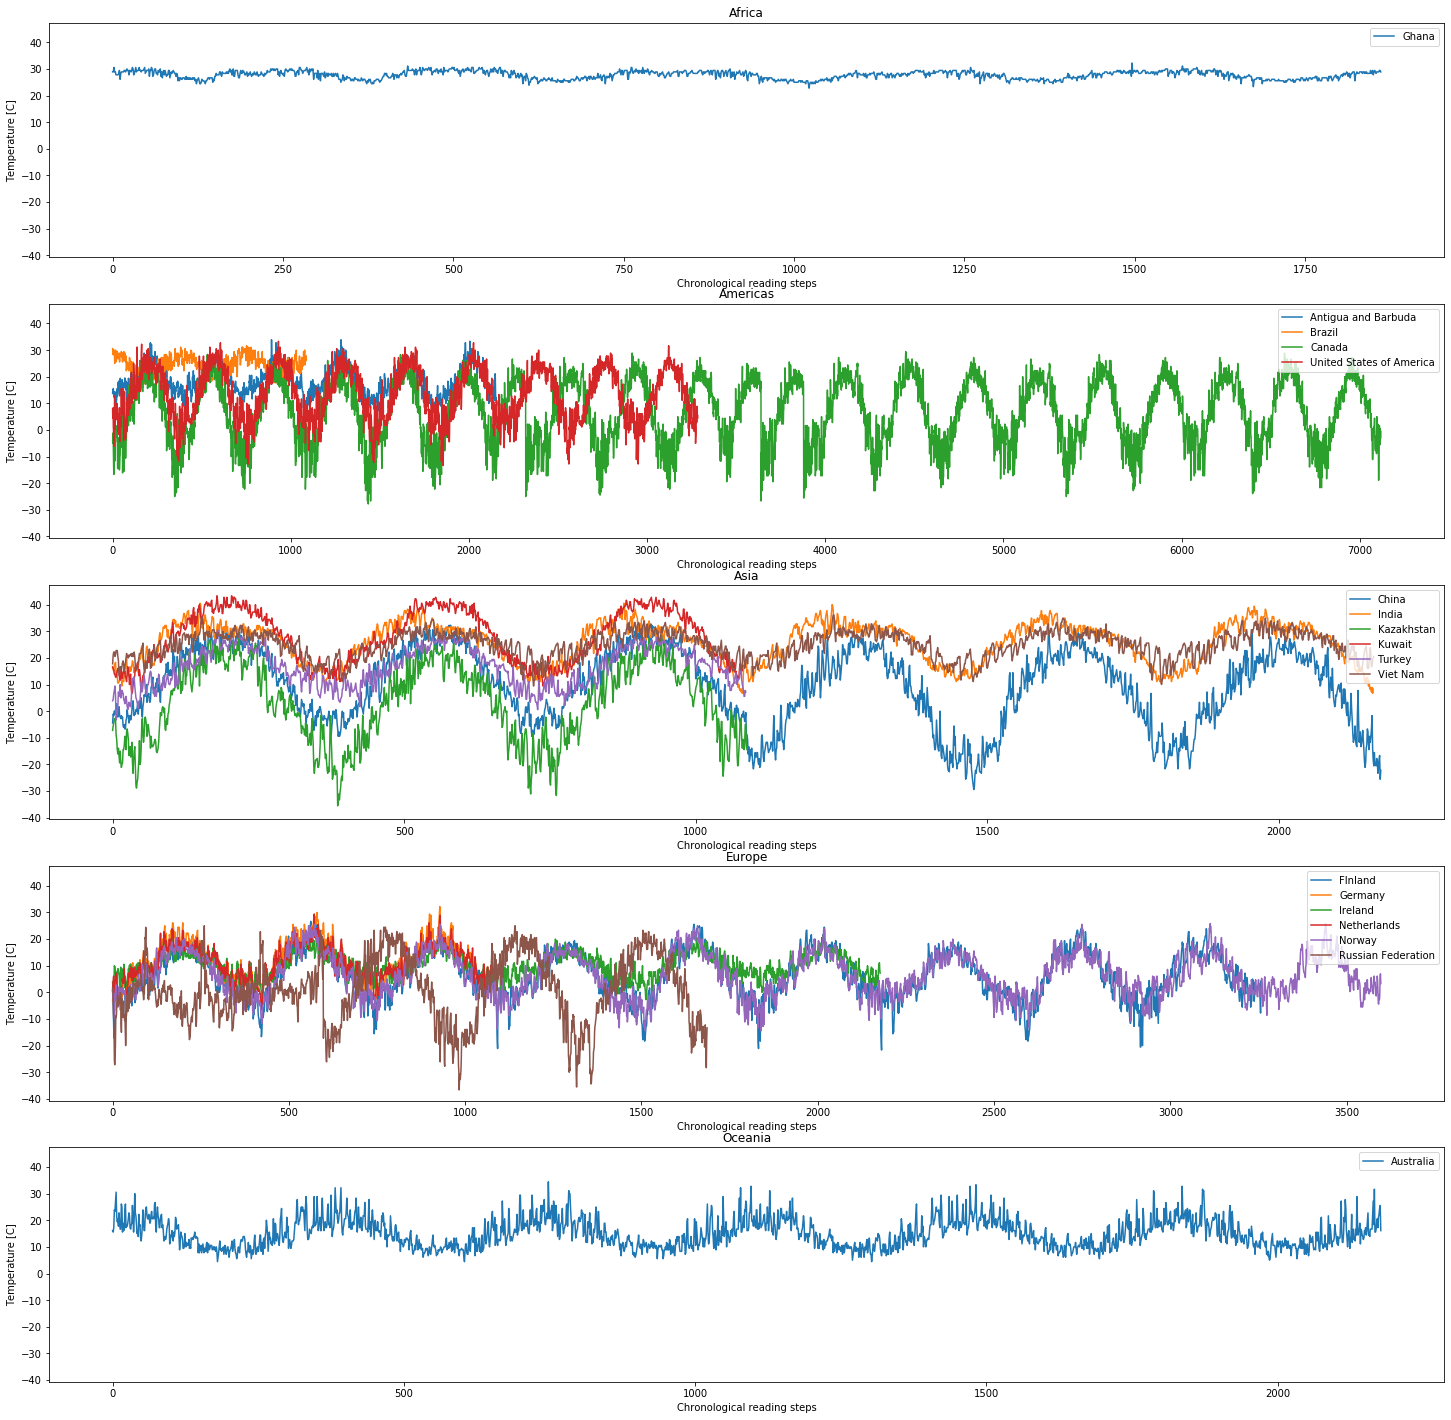

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [27]:
plot_continents(df_complete_cont, continents_in_df)

# Problem 5
"old_oslo.csv" er blitt importert i python-scriptet, hvor kolonnenavnene også er endret til å samsvare med resten av datasettene. Under kjøres trinn 3, 4 og 6 for dette datasettet. 

Datasettet "oslo_2019" består av målinger fra "df_complete_cont" gjort i Oslo i år 2019. Dette datasettet blir hentet vha. funksjonen "get_specific_df()" som er definert i python-scriptet. 

Deretter plottes både temperaturene fra "old_oslo"-datasettet og temperaturene fra "oslo_2019" vha. "plot_dfs"-funksjonen. 
Man kan se at temperaturen har steget litt fra 1980 til 2019. Oslo hadde temperaturer som gikk helt ned i -20 grader i 1980, mens i 2019 gikk temperaturen bare ned til -10 grader. Oslo hadde også en litt høyere max-temperatur i 2019 i forhold til i 1980.

In [28]:
trinn_3_4_6(old_oslo)
oslo_2019 = get_specific_df(df_complete_cont, "OSLO BLINDERN", 2019)

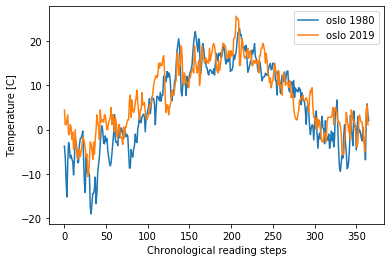

In [29]:
plot_dfs([old_oslo, oslo_2019], "TAVG", ["oslo 1980", "oslo 2019"], title = "Oslo 1980 and Oslo 2019", x_label = "Chronological reading steps", y_label = "Temperature [C]")

# Problem 6
Når man ser på grafene så kan man se at det finnes noen land som har store temperaturforskjeller avhengig om det er vinter eller sommer. For eksempel så ser man at Canada har temperaturer som varierer fra rundt 20 grader om sommeren helt ned til nesten -30 grader om vinteren. Ghanas temperatur derimot ligger ganske stabilt rundt 30 grader. Vi ønsker dermed å finne ut hvilket land som har den største variasjonen i temperatur og hvilket land som har minst variasjon.

Funksjonen "temperature_differences()" er definert for å kunne svare på dette spørsmålet. Funksjonen tar inn en valgfri df samt alle landene som finnes i dette datasettet, og returnerer en liste med hvert land og dets tilhørende temperaturvariasjon. 

Vi kan se fra resultatet at Kazakhstans temperatur varierer mest, med hele 65 grader forskjell fra laveste til høyeste målte temperatur. Ghanas temperatur derimot er mest stabil, og varierer kun med omgring 9.4 grader fra høyeste til laveste målte temperatur.

In [30]:
temperature_differences(df_complete_cont, countries_in_df)

[['Ghana', 9.439999999999998],
 ['Brazil', 15.0],
 ['Ireland', 23.89],
 ['Viet Nam', 26.67],
 ['Antigua and Barbuda', 28.330000000000002],
 ['Australia', 29.999999999999996],
 ['India', 33.89],
 ['Turkey', 33.89],
 ['Netherlands', 36.11],
 ['Kuwait', 36.66],
 ['Germany', 38.89],
 ['Norway', 40.269999999999996],
 ['United States of America', 46.66],
 ['FInland', 48.34],
 ['Canada', 57.22],
 ['China', 61.66],
 ['Russian Federation', 61.67],
 ['Kazakhstan', 65.0]]

# Problem 7

Dersom dataen hadde vært i høyere oppløsning med for eksempel time for time i stedet for gjennomsnitt for hver dag, konkluderer vi med at det ikke ville vært veldig store forskjeller på resultatene våre. Dette er fordi at vi stort sett jobber med gjennomsnittsverdier. Det er derimot mulig at vi kunne sett at grafen blir mer nøyaktig, men forskjellen ville vært liten. Trolig hadde den største forskjellen kommet fra at vi kunne sett temperaturvariasjoner mellom dag og natt, hvor det ble kaldere om natten og varmere om dagen. Dette hadde ført til at maksimalverdiene hadde steget fra gjennomsnittstemperaturen fra den varmeste dagen, til å være den høyeste temperaturen fra den varmeste dagen. Tilsvarende hadde minimums-verdiene sunket fra gjennomsnittstemperaturen fra den kaldeste dagen, til det kaldeste tidspunktet fra den kaldeste dagen.

I et stort datasett er det hensiktsmessig å starte med å rydde opp i datasettet. Det er mange verdier som ikke er nødvendig å bruke og trolig finnes det data som ikke skal være der (feilmålinger). Derfor bør man alltid fikse indekser og rydde i dataen før man starter å jobbe med den. Det kan også være lurt å lage seg et overblikk i dataen man skal jobbe med, ved bruk av «info» og «Head» funksjonene. 

Det er viktig å vite hva man skal oppnå når man jobber med data. Det er nødvendig å få oppgitt hva som skal gjøres i prosjektet slik at man kan ta utgangspunkt i dette. Et stort datasett er vanskeligere å gjøre noe med dersom man ikke har en god oppfatning av hva man skal jobbe med eller finne ut.

# Problemer og utfordringer
Da vi gikk gjennom disse oppgavene møtte vi på en rekke problemer og utfordringer underveis. Vi mistenker at majoriteten av utfordringene vi møtte på kom fra for lite erfaring med verktøyene vi brukte, som pandas, jupyter notebook og spyder.
Til tross for at vi har jobbet med disse verktøyene tidligere så lærte vi mye underveis, og vi har fortsatt mye å lære for å kunne bruke disse verktøyene til deres fulle potensial.

Da vi begynte å jobbe så gikk vi gjennom alle oppgavene i kronologisk rekkefølge og løste dem fortløpende i Spyder. Dette ga et godt overblikk over oppgavene og førte til at vi fant rimelige måter å løse dem på. Til tross for at det var en tidseffektiv måte å løse oppgavene i Spyder, så møtte vi på problemer da vi skulle presentere oppgavene i Jupyter. Koden var mye mer rotete enn den kunne ha vært, og vi tok ikke i bruk funksjoner i stor nok grad. Dette gjorde det umulig å presentere arbeidet i Jupyter uten å skrive om store deler av koden. I ettertid ser vi at vi kunne ha fått et bedre produkt raskere dersom vi hadde hatt en annen arbeidsmetode fra begynnelsen av. For eksempel så var det flere oppgaver som måtte løses flere ganger, som oppgave 3, 4 og 6. Dersom vi hadde fått et skikkelig overblikk over alle oppgavene før vi begynte arbeidet kunne vi ha skrevet generelle funksjoner for å løse disse oppgavene fra begynnelsen, i stedet for å gå tilbake og løse disse oppgavene igjen da vi skulle presentere arbeidet i Jupyter.

En annen del av oppgaven som vi fant spesielt utfordrende var oppgavene hvor vi skulle finne alternative måter å løse det samme problemet på. Å løse oppgavene vi ble bedt om gikk veldig fint, men når vi allerede har funnet en måte å løse de på så blir det ofte vanskeligere å se alternative måter. Man får trolig litt tunnelsyn og "låser seg inn" på metoden som først ble brukt, og har vanskelig for å gå helt tilbake til begynnelsen. Dette var mer en utfordring enn et problem, og jeg ser ikke en bedre "metode" å løse disse oppgavene på. 

Utenom dette så møtte vi på mindre problemer som at vi hadde vanskeligheter med å importere python-koden som en modul til Jupyter. Vi fant det også utfordrende å drøfte hvordan vi kunne konvertert en blanding av temperaturer målt i Celcius og Fahrenheit til Fahrenheit. Problem 4, hvor vi skulle plotte alle landene, var også spesielt utfordrene. Til tross for små humper i veien så kom vi - etter en del googling, tenking og diskusjon - i mål.

Problemene vi møtte på kom nok først og fremst fra at vi fortsatt er i begynnerstadiet når det gjelder både koding, rapportskriving og problemløsning. Med mer erfaring vil vi kunne løse og unngå slike utfordringer lettere enn vi kan den dag i dag.
